In [1]:
import cv2
import numpy as np
import face_recognition
from typing import List, Dict, Union

In [3]:
IMG_SIZE: int = 224
NUM_FRAMES_PER_VIDEO: int = 16
IMG_SIZE: int = 224

In [4]:
def video2frames(video_path: str, resize: Union[int, int] = (IMG_SIZE, IMG_SIZE)) -> np.array:
    cap = cv2.VideoCapture(video_path)
    frames: list = []
    is_there_frame: bool = True
    num_total_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
    resampling_rate: int = int(num_total_frames / NUM_FRAMES_PER_VIDEO)
    idf: int = 0
    while is_there_frame and len(frames) < NUM_FRAMES_PER_VIDEO:
        idf += 1
        is_there_frame, frame = cap.read()
        if frame is None: 
            return np.array([])
        if idf % resampling_rate == 0:
            # grayscale
            # frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            # resize
            frame = cv2.resize(frame, resize)
            frames.append(frame)
    #assert len(frames)==NUM_FRAMES_PER_VIDEO
    print("video2frames: ", len(frames))
    return np.array(frames)

In [11]:
URL = 'http://localhost:3001/videos/'
video ='Dw7bQRvOMTPQgwaRfZThM7yKBHPp8LhCNw2wGisOZWrpc0UKEvuzCcsHiQdgr6oi.webm'

In [12]:
cvideo = URL+video

In [13]:
frames = video2frames(cvideo)
print(frames)
#cap2= cv2.VideoCapture(cvideo2)

video2frames:  16
[[[[ 64  47  34]
   [ 64  47  34]
   [ 64  47  34]
   ...
   [117 127 137]
   [133 141 150]
   [127 129 145]]

  [[ 64  47  34]
   [ 64  47  34]
   [ 64  47  34]
   ...
   [120 125 136]
   [133 138 149]
   [125 125 137]]

  [[ 64  46  36]
   [ 64  46  36]
   [ 64  46  36]
   ...
   [117 122 134]
   [126 130 141]
   [140 140 150]]

  ...

  [[ 57  36  35]
   [ 57  36  35]
   [ 57  36  34]
   ...
   [ 50  29  31]
   [ 50  28  30]
   [ 50  28  30]]

  [[ 57  35  37]
   [ 57  35  37]
   [ 57  36  35]
   ...
   [ 51  29  30]
   [ 50  28  30]
   [ 50  28  30]]

  [[ 57  35  39]
   [ 57  35  39]
   [ 57  35  37]
   ...
   [ 51  31  27]
   [ 50  30  27]
   [ 50  30  27]]]


 [[[ 58  40  45]
   [ 58  41  44]
   [ 58  41  42]
   ...
   [117 127 137]
   [133 141 150]
   [127 129 145]]

  [[ 58  40  45]
   [ 58  41  44]
   [ 58  41  42]
   ...
   [120 125 136]
   [133 138 149]
   [125 125 137]]

  [[ 58  40  44]
   [ 58  41  44]
   [ 58  41  42]
   ...
   [117 122 134]
   [126 13

In [25]:
height = cap.get(cv2.CAP_PROP_FRAME_HEIGHT)
width = cap.get(cv2.CAP_PROP_FRAME_WIDTH)
print(height, width)

360.0 640.0


In [26]:
frames: list = []
is_there_frame: bool = True
num_total_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
resampling_rate: int = int(num_total_frames / NUM_FRAMES_PER_VIDEO)
idf: int = 0
while is_there_frame and len(frames) < NUM_FRAMES_PER_VIDEO:
    idf += 1
    is_there_frame, frame = cap.read()
    if frame is None: 
        print(np.array([]))
    if idf % resampling_rate == 0:
        # grayscale
        # frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        # resize
        frame = cv2.resize(frame, (IMG_SIZE, IMG_SIZE))
        frames.append(frame)
# assert len(frames)==NUM_FRAMES_PER_VIDEO
print(np.array(frames))


[[[[ 80  52  59]
   [ 77  53  59]
   [ 72  54  59]
   ...
   [140 139 141]
   [125 124 134]
   [ 96  85  89]]

  [[ 80  52  59]
   [ 77  53  59]
   [ 72  54  59]
   ...
   [144 141 148]
   [124 122 133]
   [ 96  86  88]]

  [[ 80  52  59]
   [ 78  53  59]
   [ 73  53  59]
   ...
   [147 143 153]
   [121 120 131]
   [ 97  87  88]]

  ...

  [[ 64  40  48]
   [ 46  22  30]
   [ 38  14  22]
   ...
   [ 82  61  60]
   [ 86  65  64]
   [ 90  69  68]]

  [[ 64  39  50]
   [ 44  19  30]
   [ 38  13  24]
   ...
   [ 79  57  59]
   [ 81  59  60]
   [ 87  65  66]]

  [[ 61  36  47]
   [ 43  18  29]
   [ 38  13  24]
   ...
   [ 88  69  63]
   [ 90  71  65]
   [ 87  68  62]]]


 [[[ 73  57  47]
   [ 73  57  47]
   [ 73  57  47]
   ...
   [140 139 141]
   [125 124 134]
   [ 96  85  89]]

  [[ 73  57  47]
   [ 73  57  47]
   [ 73  57  47]
   ...
   [144 141 148]
   [124 122 133]
   [ 96  86  88]]

  [[ 73  56  48]
   [ 73  56  48]
   [ 73  56  48]
   ...
   [147 143 153]
   [121 120 131]
   [ 97  87

In [27]:
print(len(frames))

16


In [28]:
from PIL import Image, ImageDraw
from IPython.display import display

In [29]:
pil_image = Image.fromarray(frames[0])
# pil_image1 = Image.fromarray(frames[1])

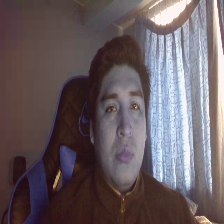

In [30]:
display(pil_image)
# display(pil_image1)

In [78]:
# img = face_recognition.load_image_file('prueba2.jpg')
# img2=  face_recognition.load_image_file('prueba.png')
face_lo = face_recognition.face_encodings(frames[0])[0]
face_lo2 = face_recognition.face_encodings(frames[10])[0]
# face_lo3 = face_recognition.face_encodings(img2)[0]
# print(face_lo)
# print(face_lo2)
# print(face_lo3)


In [79]:
matches = face_recognition.compare_faces([face_lo], face_lo2)
print(matches)

[True]


In [59]:
num_total_frames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
print(num_total_frames)

100.0
